<a href="https://colab.research.google.com/github/ACSE-jl2722/ci_mpm/blob/master/DL_module_Coursework_I_questions_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1dFgNX9iQUfmBOdmUN2-H8rPxL3SLXmxn" width="400"/>


---


### ***Name***: [*your name goes here*]
### ***CID***: [*your CID goes here*]

# Instructions:

Follow the instructions below to complete the coursework and submit it:

<br>

1. Complete your coursework using this provided Jupyter Notebook template (use Google Colab or your local machine if it has a GPU and/or sufficient computational power). Your copy of the notebook should be named: `yourusername_coursework_I.ipynb`. And don't forget to fill in the two fields at the top of this notebook with your name and CID.

<br>

2. Once you have completed your answers, upload your final notebook to the repo you got from the github classroom link. Make sure to have all the answers in there:

   - **All the cells in your final Jupyter Notebook should be executed before saving and uploading to github in order to have the output of the cells available in the uploaded version** (images you plot, training graphs generated with `livelossplot`, etc). We will not rerun code blocks in the notebooks, it is your responsibility to run them before uploading the notebook.

   - Add comments in the code to explain what you are doing at every step. 

   - All answers requiring written answers (ie, not code) should be in markdown blocks in the Jupyter Notebook. This provided Jupyter Notebook template has allocated blocks for the questions, but **you can add any coding or markdown blocks you need**.

<br>

3. The coursework is released on **Friday 9 December at 14:00h UK time**, and the answers have to be submitted on **Monday 12 December, 20:00h UK time**. We will not accept late submissions.

<br>

<br>

### The coursework consists of 5 questions you have to complete. You will find them below. 

- Questions 2 and 3 are very similar and you have to complete both of them, **you DO NOT have to choose one of them, you have to do them both.**

- You can use code seen in class, but indicate clearly when you do, and **make it clear (using comments or markdown blocks) what are your modifications**. This will influence your final marks.

- Your final marks will depend both on the quality of your results **AND** the justification, explanation and rationale of your implementations.

- Reference any publications and other materials that you use, but keep in mind that **your implementations should be original and not copied from any online resources (we will check for plagiarism)**. It is ok to use other resources to understand concepts and draw inspiration, but always reference them properly in the notebook.

- Finally, **justify your answers well, but focus on what the question is asking**. I will penalise lengthy answers that do not have any relation with the question being addressed.

<br>

---

<br>

## Imports

In [57]:
### write the imports you will need here.
!pip install livelossplot
%pylab inline

from livelossplot import PlotLosses

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import numpy as np
import pandas as pd
import random 

def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = False

    return True

device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Populating the interactive namespace from numpy and matplotlib
Cuda installed! Running on GPU!


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['Generator', 'figure', 'step', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [58]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

Mounted at /content/drive


<br>

---

<br>

## **Q1** - Download and prepare the Fashion MNIST dataset [10 points]

Get the `FashionMNIST` dataset from `torchvision.datasets`

- Inspect the dataset and format the data as you see fit to use it in your next questions. Explain the process you follow.

- Plot a matrix of images with 10 examples of each class.

- Is the dataset well balanced (does it have similar number of samples for each class)? Generate and present data to support your answer in any form you see fit.

In [59]:
import torchvision
# add the transform
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))])
 

train_dataset = torchvision.datasets.FashionMNIST(root="./Fa_data", train=True, download=True, transform=trans)
test_dataset = torchvision.datasets.FashionMNIST(root="./Fa_data", train= False, download=True, transform=trans)

In [60]:
print(type(train_dataset), "\n")
print(train_dataset, "\n")
print(dir(train_dataset), "\n") # Information held in the dataset object

<class 'torchvision.datasets.mnist.FashionMNIST'> 

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./Fa_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           ) 

['__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_exists', '_check_legacy_exist', '_format_transform_repr', '_is_protocol', '_load_data', '_load_legacy_data', '_repr_indent', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'mirrors', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_tr

In [61]:
class_to_idx = list(train_dataset.class_to_idx)
print(class_to_idx)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


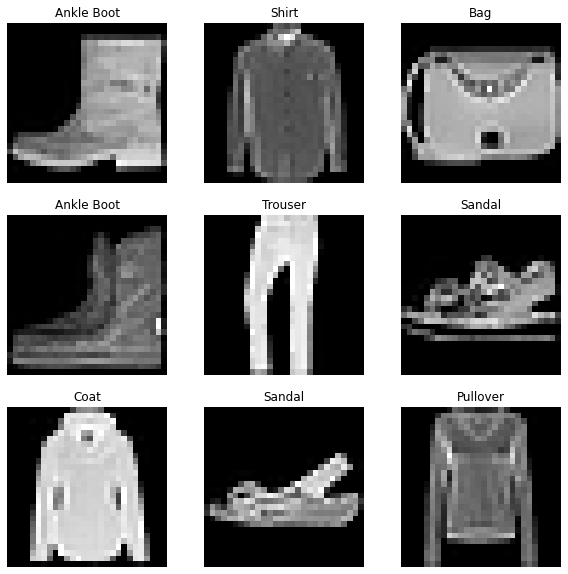

In [62]:
# show data type
labels = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(10, 10))
cols, rows = 3,3
set_seed(42)
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

torch.Size([100, 1, 28, 28]) torch.Size([100])


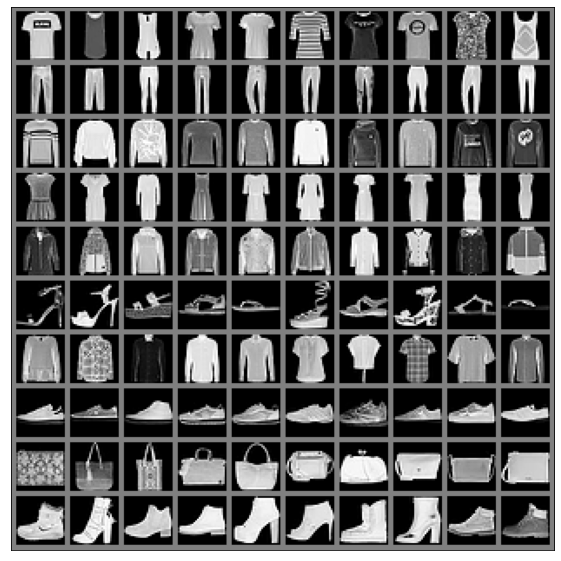

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9])


In [63]:
#reshape the data，show 10 items for the same class
from itertools import cycle
class RepeatClassSampler(torch.utils.data.Sampler):
    def __init__(self, targets, repeat_count, length, shuffle=False):
        if not torch.is_tensor(targets):
            targets = torch.tensor(targets)

        self.targets = targets
        self.repeat_count = repeat_count
        self.length = length
        self.shuffle = shuffle

        self.classes = torch.unique(targets).tolist()
        self.class_indices = dict()
        for label in self.classes:
            self.class_indices[label] = torch.nonzero(targets == label).flatten() 
    def __iter__(self):
        class_index_iters = dict()
        for label in self.classes:
            if self.shuffle:
                class_index_iters[label] = cycle(self.class_indices[label][torch.randperm(len(self.class_indices))].tolist())
            else:
                class_index_iters[label] = cycle(self.class_indices[label].tolist())
        xx=[0,1,2,3,4,5,6,7,8,9]
        target_iter = cycle(xx)   
        def index_generator():
            for i in range(self.length):
                if i % self.repeat_count == 0:
                    current_class = next(target_iter)
                yield next(class_index_iters[current_class])   
        return index_generator()

    def __len__(self):
        return self.length

dataloader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=100,
        sampler=RepeatClassSampler(
            targets=train_dataset.targets,
            repeat_count=10,
            length=100,      
            shuffle=False))

set_seed(42)
batch_size = 100 # The batch size change
num_workers = 0 # Subprocess for loading the data

train_batch_sample, train_batch_targets = next(iter(dataloader)) # syntax for directly iterating over the data loader
print(train_batch_sample.shape, train_batch_targets.shape)

# Visualise batch
from torchvision.utils import make_grid
batch_grid = make_grid(train_batch_sample, nrow=10, padding=3)
plt.figure(figsize=(10,10))
plt.imshow(batch_grid[0], cmap="gray") # index because make_grid transforms grayscale images to RGB
plt.xticks([])
plt.yticks([])
plt.show()

print(train_batch_targets)

The dataset is well balanced. 
<br>
<br>
Every clothing item has 6,000 samples which can be shown as:

In [64]:
# show how many Sample overall
targets = train_dataset.targets		
len_target = len(targets)
print("Overall we have {} samples".format(len_target))

Overall we have 60000 samples


In [65]:
# count samples for each label
# we found the labels are well balanced
num_count = [0] * 10

for i in targets:
    num = i.item()
    num_count[num] += 1

num_count = pd.DataFrame(num_count)
print(num_count)  

      0
0  6000
1  6000
2  6000
3  6000
4  6000
5  6000
6  6000
7  6000
8  6000
9  6000


<br>

---

<br>

## **Q2** - Implement a **conditional VAE** [25 points]

Implement a VAE similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your decoder, you have to tell it which class you want it to generate. <br> *During the lectures we created a VAE that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation 
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional VAE to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?

Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).



In [ ]:
# new
import os
import time
import torch
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from collections import defaultdict
import torchvision.datasets as dsets
import torch.nn as nn
import PIL.Image as Image
import torchvision.transforms as tforms
import torchvision

transform = tforms.Compose(
    [tforms.Resize(size=(28, 28), interpolation=Image.BICUBIC),
    #  tforms.Grayscale(),
     tforms.ToTensor(),]
    #  tforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)]
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


batch_size = 500
encoder_layer_sizes=[784, 256]
decoder_layer_sizes=[256, 784]
latent_size=2
print_every=100
epochs = 10

In [ ]:

data_loader = DataLoader(
    dataset=dsets.FashionMNIST('data/FashionMNIST', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

def loss_fn(recon_x, x, mean, log_var):
    BCE = torch.nn.functional.binary_cross_entropy(
        recon_x.view(-1, 28*28), x.view(-1, 28*28), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())

    return (BCE + KLD) / x.size(0)

def idx2onehot(idx, n):

    assert torch.max(idx).item() < n

    if idx.dim() == 1:
        idx = idx.unsqueeze(1)
    onehot = torch.zeros(idx.size(0), n).to(idx.device)
    onehot.scatter_(1, idx, 1)
    
    return onehot

In [ ]:
class VAE(nn.Module):

    def __init__(self, encoder_layer_sizes, latent_size, decoder_layer_sizes, num_labels=0):
        super().__init__()

        assert type(encoder_layer_sizes) == list
        assert type(latent_size) == int
        assert type(decoder_layer_sizes) == list
        self.latent_size = latent_size
        self.encoder = Encoder(
            encoder_layer_sizes, latent_size, num_labels)
        self.decoder = Decoder(
            decoder_layer_sizes, latent_size, num_labels)

    def forward(self, x, c=None):
        if x.dim() > 2:
            x = x.view(-1, 28*28)
        means, log_var = self.encoder(x, c)
        z = self.reparameterize(means, log_var)
        recon_x = self.decoder(z, c)

        return recon_x, means, log_var, z

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def inference(self, z, c=None):
        recon_x = self.decoder(z, c)
        return recon_x


class Encoder(nn.Module):
    def __init__(self, layer_sizes, latent_size, num_labels):
        super().__init__()

        layer_sizes[0] += num_labels
        self.MLP = nn.Sequential()

        for i, (in_size, out_size) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
            self.MLP.add_module(
                name="L{:d}".format(i), module=nn.Linear(in_size, out_size))
            self.MLP.add_module(name="A{:d}".format(i), module=nn.ReLU())

        self.linear_means = nn.Linear(layer_sizes[-1], latent_size)
        self.linear_log_var = nn.Linear(layer_sizes[-1], latent_size)

    def forward(self, x, c=None):
        c = idx2onehot(c, n=10)
        x = torch.cat((x, c), dim=-1)
        x = self.MLP(x)
        means = self.linear_means(x)
        log_vars = self.linear_log_var(x)

        return means, log_vars


class Decoder(nn.Module):
    def __init__(self, layer_sizes, latent_size, num_labels):
        super().__init__()
        self.MLP = nn.Sequential()
        input_size = latent_size + num_labels

        for i, (in_size, out_size) in enumerate(zip([input_size]+layer_sizes[:-1], layer_sizes)):
            self.MLP.add_module(
                name="L{:d}".format(i), module=nn.Linear(in_size, out_size))
            if i+1 < len(layer_sizes):
                self.MLP.add_module(name="A{:d}".format(i), module=nn.ReLU())
            else:
                self.MLP.add_module(name="sigmoid", module=nn.Sigmoid())

    def forward(self, z, c):
        c = idx2onehot(c, n=10)
        z = torch.cat((z, c), dim=-1)

        x = self.MLP(z)

        return x


In [ ]:
vae = VAE(
    encoder_layer_sizes=encoder_layer_sizes,
    latent_size=latent_size,
    decoder_layer_sizes=decoder_layer_sizes,
    num_labels=10).to(device)

In [ ]:
optimizer = torch.optim.Adam(vae.parameters(), lr=0.001)

logs = defaultdict(list)

for epoch in range(epochs):

    tracker_epoch = defaultdict(lambda: defaultdict(dict))

    for iteration, (x, y) in enumerate(data_loader):

        x, y = x.to(device), y.to(device)

        # if args.conditional:
        recon_x, mean, log_var, z = vae(x, y)
        # else:
            # recon_x, mean, log_var, z = vae(x)

        loss = loss_fn(recon_x, x, mean, log_var)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        logs['loss'].append(loss.item())
    print(epoch)
    if epoch % 10 == 0:
        for i in range(10):
            c = torch.arange(0, 10).long().unsqueeze(1).to(device)
            z = torch.randn([c.size(0),latent_size]).to(device)
            if i == 0:
                result = vae.inference(z, c=c)
                result = result.view(10,1,28,28)
            else:
                x = vae.inference(z, c=c)
                x = x.view(10,1,28,28)
                result = torch.cat([result,x],dim = 0)

        torchvision.utils.save_image(result, 'output/Epoch_%d.jpg'% epoch, nrow=10)


In [ ]:
# eample by chatgpt
import torch
from torch import nn
from torch.nn import functional as F

# Define the CVAE class
class CVAE(nn.Module):
    def __init__(self, input_size, latent_size, num_classes):
        super().__init__()

        # Define the encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size + num_classes, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 2 * latent_size),
        )

        # Define the decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_size + num_classes, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
            nn.Sigmoid(),
        )

  
    def to_categrical(self, y: torch.FloatTensor):
        y_n = y.numpy()
        self.lb.fit(list(range(0,10)))
        y_one_hot = self.lb.transform(y_n)
        floatTensor = torch.FloatTensor(y_one_hot)
        return floatTensor

    def forward(self, X, y):
        # Encode the input and the class labels
        z_mu, z_log_var = self.encoder(torch.cat([X, y], dim=1)).chunk(2, dim=1)

        # Sample a latent vector
        z = self.reparameterize(z_mu, z_log_var)

        # Decode the latent vector and the class labels
        X_recon = self.decoder(torch.cat([z, y], dim=1))

        # Compute the loss
        loss = self.calculate_loss(X, X_recon, z_mu, z_log_var)

        return X_recon, loss

    def reparameterize(self, z_mu, z_log_var):
        # Sample a latent vector from the normal distribution
        z = z_mu + torch.randn_like(z_mu) * torch.exp(0.5 * z_log_var)
        return z

    def calculate_loss(self, X, X_recon, z_mu, z_log_var):
        # Compute the reconstruction loss
        recon_loss = F.binary_cross_entropy(X_recon,


In [38]:
# get from github
import torch
import matplotlib.pyplot as plt
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image

# cuda setup
device = torch.device("cuda")
kwargs = {'num_workers': 1, 'pin_memory': True} 

# hyper params
batch_size = 64
latent_size = 20
epochs = 10


train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=False, **kwargs)


def one_hot(labels, class_size):
    targets = torch.zeros(labels.size(0), class_size)
    for i, label in enumerate(labels):
        targets[i, label] = 1
    return targets.to(device)


class CVAE(nn.Module):
    def __init__(self, feature_size, latent_size, class_size):
        super(CVAE, self).__init__()
        self.feature_size = feature_size
        self.class_size = class_size

        # encode
        self.fc1  = nn.Linear(feature_size + class_size, 400)
        self.fc21 = nn.Linear(400, latent_size)
        self.fc22 = nn.Linear(400, latent_size)

        # decode
        self.fc3 = nn.Linear(latent_size + class_size, 400)
        self.fc4 = nn.Linear(400, feature_size)

        self.elu = nn.ELU()
        self.sigmoid = nn.Sigmoid()

    def encode(self, x, c): # Q(z|x, c)
        '''
        x: (bs, feature_size)
        c: (bs, class_size)
        '''
        inputs = torch.cat([x, c], 1) # (bs, feature_size+class_size)
        h1 = self.elu(self.fc1(inputs))
        z_mu = self.fc21(h1)
        z_var = self.fc22(h1)
        return z_mu, z_var

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z, c): # P(x|z, c)
        '''
        z: (bs, latent_size)
        c: (bs, class_size)
        '''
        inputs = torch.cat([z, c], 1) # (bs, latent_size+class_size)
        h3 = self.elu(self.fc3(inputs))
        return self.sigmoid(self.fc4(h3))

    def forward(self, x, c):
        mu, logvar = self.encode(x.view(-1, 28*28), c)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, c), mu, logvar

# create a CVAE model
model = CVAE(28*28, latent_size, 10).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)
        labels = one_hot(labels, 10)
        recon_batch, mu, logvar = model(data, labels)
        optimizer.zero_grad()
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.detach().cpu().numpy()
        optimizer.step()
        if batch_idx % 20 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, labels) in enumerate(test_loader):
            data, labels = data.to(device), labels.to(device)
            labels = one_hot(labels, 10)
            recon_batch, mu, logvar = model(data, labels)
            test_loss += loss_function(recon_batch, data, mu, logvar).detach().cpu().numpy()
            if i == 0:
                n = min(data.size(0), 5)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(-1, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))


for epoch in range(1, epochs + 1):
        train(epoch)
        test(epoch)
        with torch.no_grad():
            c = torch.eye(10, 10).cuda()
            sample = torch.randn(10, 20).to(device)
            sample = model.decode(sample, c).cpu()
            #img = sample.view(1, 10, 28, 28)
            #plt.imshow(img)
            #plt.show()
            save_image(sample.view(10, 1, 28, 28),
                       'sample_' + str(epoch) + '.png')

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw

Train Epoch: 1 [0/60000 (0%)]	Loss: 549.784485
Train Epoch: 1 [1280/60000 (2%)]	Loss: 365.508148
Train Epoch: 1 [2560/60000 (4%)]	Loss: 333.340698
Train Epoch: 1 [3840/60000 (6%)]	Loss: 297.460205
Train Epoch: 1 [5120/60000 (9%)]	Loss: 288.290771
Train Epoch: 1 [6400/60000 (11%)]	Loss: 265.428680
Train Epoch: 1 [7680/60000 (13%)]	Loss: 289.814758
Train Epoch: 1 [8960/60000 (15%)]	Loss: 283.684418
Train Epoch: 1 [10240/60000 (17%)]	Loss: 295.729645
Train Epoch: 1 [11520/60000 (19%)]	Loss: 256.140320
Train Epoch: 1 [12800/60000 (21%)]	Loss: 258.403748
Train Epoch: 1 [14080/60000 (23%)]	Loss: 273.714722
Train Epoch: 1 [15360/60000 (26%)]	Loss: 294.300018
Train Epoch: 1 [16640/60000 (28%)]	Loss: 276.353455
Train Epoch: 1 [17920/60000 (30%)]	Loss: 267.531189
Train Epoch: 1 [19200/60000 (32%)]	Loss: 256.281494
Train Epoch: 1 [20480/60000 (34%)]	Loss: 276.589783
Train Epoch: 1 [21760/60000 (36%)]	Loss: 

In [30]:
import torch
def plot_sample(autoencoder, z, c):
    img = autoencoder.decode(z, c).detach().numpy()[0,0]
    plt.imshow(img)
    plt.show()
    plt.savefig("./generated_image.jpg")  # Save the figure to google drive!
    print(z)

    z = torch.randn(10, 20).to(device)
    z = model.decode(sample, c).cpu()
    c = torch.eye(10, 10).cuda()

plot_sample(CVAE, z, c)


TypeError: ignored

In [ ]:
batch_size = 100
data = torch.utils.data.DataLoader(
                   train_dataset,
                   batch_size=batch_size, shuffle=True) 

In [2]:

from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import matplotlib.pyplot as plt


In [2]:
# change by zoey
class CVAE_Encoder(nn.Module):  # The Encoder inherits the properties of nn.Module https://pytorch.org/docs/stable/generated/torch.nn.Module.html
  def __init__(self):
    '''
    Class contains the Encoder (image -> latent).
    '''
    super(VAE_Encoder, self).__init__()


    self.layer1 = nn.Sequential(
        nn.Linear(794, 512),# 784+10
        nn.ReLU()
    )

    self.layer2 = nn.Sequential(
        nn.Linear(512, 256),
        nn.ReLU()
    )

    self.layer3 = nn.Sequential(
        nn.Linear(256, 128),
        nn.ReLU()
    )

    self.layerMu = nn.Sequential(
        nn.Linear(128, 20),

    )

    self.layerSigma = nn.Sequential(
        nn.Linear(128, 20),
    
    )

  def forward(self, x, c):  # add c 
    '''
    x: [float] the MNIST image
    '''
    x = torch.cat([x, c], 1) # change input 
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    mu =  self.layerMu(x)
    sigma = torch.exp(self.layerSigma(x))
    return mu, sigma

In [ ]:
 def decode(self, z, c): # P(x|z, c)
        '''
        z: (bs, latent_size)
        c: (bs, class_size)
        '''
        inputs = torch.cat([z, c], 1) # (bs, latent_size+class_size)
        h3 = self.elu(self.fc3(inputs))
        return self.sigmoid(self.fc4(h3))

In [3]:
# change by zoey
class CVAE_Decoder(nn.Module):  # The Encoder inherits the properties of nn.Module https://pytorch.org/docs/stable/generated/torch.nn.Module.html
  def __init__(self):
    '''
    Class contains the Decoder (latent -> image).
    '''

    super(VAE_Decoder, self).__init__()

    self.layerLatent = nn.Sequential(
        nn.Linear(20, 128),
        # Does the latent vector have an activation?
    )

    self.layer1 = nn.Sequential(
        nn.Linear(128, 256),
        nn.ReLU()
    )

    self.layer2 = nn.Sequential(
        nn.Linear(256, 512),
        nn.ReLU()
    )

    self.layer3 = nn.Sequential(
        nn.Linear(512, 794),
        nn.Sigmoid() # Does this need an activation?
    )

  def forward(self, z, c):  # Custom pytorch modules should follow this structure 
    '''
        z: (bs, latent_size)
        c: (bs, class_size)
    '''
    z = torch.cat([z, c], 1)
    # 这句话？
    z = self.layerLatent(z)
    z = self.layer1(z)
    z = self.layer2(z)
    z = self.layer3(z)
    return z.reshape((-1,1,28,28))  # Reshape the vector into an image


In [4]:
#change by zoey
class CVAE(nn.Module):
  def __init__(self, device):
    '''
    Class combines the Encoder and the Decoder with a VAE latent space.
    '''
    super(VAE, self).__init__()
    self.device = device
    self.encoder = VAE_Encoder()
    self.decoder = VAE_Decoder()
    self.distribution = torch.distributions.Normal(0, 1)  # Sample from N(0,1)


  def sample_latent_space(self, mu, sigma):
    z = mu + sigma * self.distribution.sample(mu.shape).to(self.device)  # (1) Sample the latent distribution
    kl_div = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()  # A term, which is required for regularisation
    return z, kl_div
   

  def forward(self, x, c):
    '''
    x - [float] A batch of images from the data-loader
    '''

    mu, sigma = self.encoder(x.view(-1, 28*28), c)  ## (1) Generate the latent vectors Mu and Sigma
    z, kl_div = self.sample_latent_space(mu, sigma)  ## (2) Generate the latent vector sample 
    z = self.decoder(z)  ## (3) Generate the reconstructed image
    return z, kl_div

    def forward(self, x, c):
        mu, logvar = self.encode(x.view(-1, 28*28), c)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, c), mu, logvar
print('done')

done


In [6]:
# https://github.com/unnir/cVAE/blob/master/cvae.py
def one_hot(labels, class_size):
    targets = torch.zeros(labels.size(0), class_size)
    for i, label in enumerate(labels):
        targets[i, label] = 1
    return targets.to(device)


class CVAE(nn.Module):

    def __init__(self, feature_size, latent_size, class_size):
        super(CVAE, self).__init__()
        self.feature_size = feature_size
        self.class_size = class_size

        # encode
        self.layer1 = nn.Sequential(
            nn.Linear(794, 512),# 784+10
            nn.ReLU()
        )

        self.layer2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU()
        )

        self.layer3 = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU()
        )

        self.layerMu = nn.Sequential(
            nn.Linear(128, 20),

        )

        self.layerSigma = nn.Sequential(
            nn.Linear(128, 20),
        
        )

        

        # decode
        
        self.layerLatent = nn.Sequential(
        nn.Linear(20, 128),
        # Does the latent vector have an activation?
    )

        self.layer1 = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU()
        )

        self.layer2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU()
        )

        self.layer3 = nn.Sequential(
            nn.Linear(512, 794),
            nn.Sigmoid() # Does this need an activation?
        )

        # activation function
        self.elu = nn.ELU()
        self.Sigmoid = nn.Sigmoid()
        
    def encode(self, x, c): # Q(z|x, c)
        '''
        x: (bs, feature_size)
        c: (bs, class_size)
        '''
        inputs = torch.cat([x, c], 1) # (bs, feature_size+class_size)
        h1 = self.elu(self.fc1(inputs))
        z_mu = self.fc21(h1)
        z_var = self.fc22(h1)
        return z_mu, z_var

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z, c): # P(x|z, c)
        '''
        z: (bs, latent_size)
        c: (bs, class_size)
        '''
        inputs = torch.cat([z, c], 1) # (bs, latent_size+class_size)
        h3 = self.elu(self.fc3(inputs))
        return self.sigmoid(self.fc4(h3))

    def forward(self, x, c):
        mu, logvar = self.encode(x.view(-1, 28*28), c)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, c), mu, logvar

# create a CVAE model
latent_size = 10
model = CVAE(28*28, latent_size, 10).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)
        labels = one_hot(labels, 10)
        recon_batch, mu, logvar = model(data, labels)
        optimizer.zero_grad()
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.detach().cpu().numpy()
        optimizer.step()
        if batch_idx % 20 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


In [16]:
# create a CVAE model
latent_size = 10
model = CVAE(28*28, latent_size, 10).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, labels) in enumerate(train_dataset):
        data, labels = data.to(device), labels.to(device)
        labels = one_hot(labels, 10)
        recon_batch, mu, logvar = model(data, labels)
        optimizer.zero_grad()
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.detach().cpu().numpy()
        optimizer.step()
        if batch_idx % 20 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, labels) in enumerate(train_dataset):
            data, labels = data.to(device), labels.to(device)
            labels = one_hot(labels, 10)
            recon_batch, mu, logvar = model(data, labels)
            test_loss += loss_function(recon_batch, data, mu, logvar).detach().cpu().numpy()
            if i == 0:
                n = min(data.size(0), 5)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(-1, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(train_dataset.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

epochs = 10

for epoch in range(1, epochs + 1):
        train(epoch)
        test(epoch)
        with torch.no_grad():
            c = torch.eye(10, 10).cuda()
            sample = torch.randn(10, 20).to(device)
            sample = model.decode(sample, c).cpu()
            save_image(sample.view(10, 1, 28, 28),
                       'sample_' + str(epoch) + '.png')

AttributeError: ignored

In [ ]:
class VAE_Encoder(nn.Module):  # The Encoder inherits the properties of nn.Module https://pytorch.org/docs/stable/generated/torch.nn.Module.html
  def __init__(self):
    '''
    Class contains the Encoder (image -> latent).
    '''

    super(VAE_Encoder, self).__init__()
    self.layer0 = nn.Linear(784+10, 512)  # Image to hidden, fully connected
    self.transform0 = nn.ReLU()
    self.layer1 = nn.Linear(512, 256)  # Image to hidden, fully connected
    self.transform1 = nn.ReLU()
    self.layer2 = nn.Linear(512, 256)
    self.transform2 = nn.ReLU()


  def forward(self, x):  # Custom pytorch modules should follow this structure 
    '''
    x: [float] the MNIST image
    '''

    x = torch.flatten(x, start_dim = 1)  # Reshape the input into a vector (nD to 1D) 
    x = self.transform0(self.layer0(x))  # Run Image through Linear transform then ReLu activation function
    x = self.transform1(self.layer1(x))  # Run Image through Linear transform then ReLu activation function
    return x

  def encode(self, x, c): # Q(z|x, c)
        '''
        x: (bs, feature_size)
        c: (bs, class_size)
        '''
        inputs = torch.cat([x, c], 1) # (bs, feature_size+class_size)
        h1 = self.elu(self.fc1(inputs))
        z_mu = self.fc21(h1)
        z_var = self.fc22(h1)
        return z_mu, z_var



print('done')

done


In [ ]:
class VAE_Decoder(nn.Module):
  def __init__(self):
    '''
    Class contains the Decoder (latent -> image).
    '''

    super(VAE_Decoder, self).__init__()
    self.layer1 = nn.Linear(256, 512)  # Connectivity Latent to Hidden
    self.activation1 = nn.ReLU()
    self.layerOut = nn.Linear(512, 784)  # Connectivity Hidden to Image
    self.activationOut = nn.Sigmoid()

  def forward(self, z):
    '''
    z: [float] a sample from the latent variable
    '''

    z = self.activation1(self.layer1(z))  # Run Image through Linear transform then ReLu activation function
    z = self.activationOut(self.layerOut(z))  # Run Image through Linear transform then Sigmoid activation function
    return  z.reshape((-1,1,28,28))  # Reshape the vector into an image

print('done')

done


In [ ]:
class VariationalAutoencoder(nn.Module):
  def __init__(self, dims_latent):
    '''
    Class combines the Encoder and the Decoder.

    dims_latent: [int] the dimension of (number of nodes in) the mean-field gaussian latent variable
    '''
    
    super(VariationalAutoencoder, self).__init__()
    self.encoder = VAE_Encoder()
    self.decoder = VAE_Decoder()

    self.layerMu = nn.Linear(256, dims_latent)  # Hidden to latent, fully connected
    self.layerSig = nn.Linear(256, dims_latent)  # Hidden to latent, fully connected
    self.distribution = torch.distributions.Normal(0, 1)  # Sample from N(0,1)

    self.latentOut = nn.Linear(dims_latent, 256)  # Connectivity Latent to Hidden
    self.activationOut = nn.ReLU()


  def vae_latent_space(self, x):
    mu =  self.layerMu(x)  # Turn the output of the Encoder into Mu
    sigma = torch.exp(self.layerSig(x))  # Exponential activation ensures positivity for Sigma
    z = mu + sigma * self.distribution.sample(mu.shape).to(device)
    kl_div = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
    return z, kl_div

  def forward(self, x):
    x = self.encoder(x)
    z, kl_div = self.vae_latent_space(x)
    z = self.activationOut(self.latentOut(z))  # Take the latent vector and make the input for the Decoder
    return self.decoder(z), kl_div

print('done')


done


In [ ]:
class VariationalAutoencoder(nn.Module):
  def __init__(self, dims_latent):
    '''
    Class combines the Encoder and the Decoder.

    dims_latent: [int] the dimension of (number of nodes in) the mean-field gaussian latent variable
    '''
    
    super(VariationalAutoencoder, self).__init__()
    self.encoder = VAE_Encoder()
    self.decoder = VAE_Decoder()

    self.layerMu = nn.Linear(256, dims_latent)  # Hidden to latent, fully connected
    self.layerSig = nn.Linear(256, dims_latent)  # Hidden to latent, fully connected
    self.distribution = torch.distributions.Normal(0, 1)  # Sample from N(0,1)

    self.latentOut = nn.Linear(dims_latent, 256)  # Connectivity Latent to Hidden
    self.activationOut = nn.ReLU()


  def cvae_latent_space(self, x):
    mu =  self.layerMu(x)  # Turn the output of the Encoder into Mu
    sigma = torch.exp(self.layerSig(x))  # Exponential activation ensures positivity for Sigma
    z = mu + sigma * self.distribution.sample(mu.shape).to(device)
    kl_div = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
    return z, kl_div
  



  def forward(self, x):
    x = self.encoder(x)
    z, kl_div = self.vae_latent_space(x)
    z = self.activationOut(self.latentOut(z))  # Take the latent vector and make the input for the Decoder
    return self.decoder(z), kl_div

print('done')




In [ ]:
def train(autoencoder, data, kl_div_on=True, epochs=10):
  opt = torch.optim.Adam(autoencoder.parameters())
  for epoch in range(epochs):  # Run data over numerous epochs
    for batch, label in data:  # Iterate over the batches of images and labels
      batch = batch.to(device)  # Send batch of images to the GPU
      opt.zero_grad()  # Set optimiser grad to 0
      x_hat, KL = autoencoder(batch)  # Generate predicted images (x_hat) by running batch of images through autoencoder
      loss = ((batch - x_hat)**2).sum() + KL  # Calculate combined loss
      loss.backward()  # Back-propagate
      opt.step()  # Step the optimiser
  return autoencoder  # Return the trained autoencoder (for later analysis)


dims_latent = 2  # Maybe increase this an try the t-sne algorithm for visualisation?!
VAE = VariationalAutoencoder(dims_latent).to(device)
VAE = train(VAE, data, 10)

print('done')


done


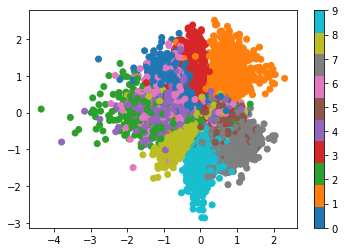

tensor([8, 3, 7, 5, 7, 7, 3, 8, 2, 7, 6, 7, 4, 4, 6, 5, 8, 3, 5, 5, 4, 1, 2, 8,
        9, 3, 6, 1, 8, 0, 5, 4, 5, 9, 4, 4, 9, 4, 4, 3, 7, 5, 8, 2, 0, 3, 7, 2,
        9, 6, 0, 5, 5, 4, 7, 1, 0, 5, 7, 7, 0, 1, 0, 9, 9, 8, 9, 3, 0, 9, 0, 1,
        9, 0, 5, 2, 0, 6, 1, 7, 6, 4, 8, 0, 5, 1, 3, 6, 2, 7, 8, 8, 0, 8, 4, 0,
        7, 1, 1, 2])
tensor(8)


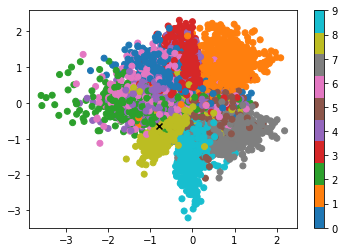

In [ ]:
def plot_2D_latent_space(autoencoder, data, num_batches=100):
    '''
    Plot a the latent vector for a lots of images
    '''
    for n , (x, y) in enumerate(data):  # enumerate means n = n + 1 per iteration. x is the batch of images, y are the class labels
        z, KL = autoencoder.vae_latent_space(autoencoder.encoder(x.to(device)))  # Run the batch through the Encoder and Latent input layer
        z = z.to('cpu').detach().numpy()  # Send latent vector to cpu
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')  # Scatter plot of latent vector colourised by the class label y
        if n > num_batches:  # stop after n > maximum number of batches
          plt.colorbar()
          break

def plot_2D_latent_sample(autoencoder, image):
    '''
    Plot a the latent vector for a single image
    '''
    z, KL = autoencoder.vae_latent_space(autoencoder.encoder(image.to(device)))  # Run the image through the Encoder and Latent input layer
    z = z.to('cpu').detach().numpy()  # Send latent vector to cpu
    plt.scatter(z[:, 0], z[:, 1], marker='x', c='k')  # Scatter plot of latent vector

plot_2D_latent_space(VAE, data)
plt.show()

x,y = next(iter(data)) # Get next iteration from data iterator
print(y)

n = 0  # Choose a label
print(y[n]) # Print out chose label

image = x[n]
plt.figure()
plot_2D_latent_space(VAE, data)
plot_2D_latent_sample(VAE, image)


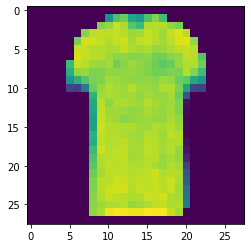

tensor([-0.9471,  1.5401], device='cuda:0')


<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_sample(autoencoder, z):
    img = autoencoder.decoder(autoencoder.activationOut(autoencoder.latentOut(z))).to('cpu').detach().numpy()[0,0]
    plt.imshow(img)
    plt.show()
    plt.savefig("./generated_image.jpg")  # Save the figure to google drive!
    print(z)

z = torch.randn(2).to(device).float()
plot_sample(VAE, z)


In [5]:
import torch
from torch import nn

class CVAE(nn.Module):
  def __init__(self, latent_size=10):
    super().__init__()
    self.latent_size = latent_size

    # Encoder:
    self.encoder = nn.Sequential(
      # Define the encoder layers here
      nn.Linear(28 * 28, 512),
      nn.ReLU(),
      nn.Linear(512, 256),
      nn.ReLU(),
      nn.Linear(256, 128),
      nn.ReLU(),
      nn.Linear(128, self.latent_size * 2)
    )

    # Decoder:
    self.decoder = nn.Sequential(
      # Define the decoder layers here
      nn.Linear(self.latent_size, 128),
      nn.ReLU(),
      nn.Linear(128, 256),
      nn.ReLU(),
      nn.Linear(256, 512),
      nn.ReLU(),
      nn.Linear(512, 28 * 28),
      nn.Sigmoid()
    )

  def forward(self, x):
    # Define the forward pass for the CVAE here
    # Encode the input image to get the mean and log-variance
    x = self.encoder(x)
    mean, log_var = x[:, :self.latent_size], x[:, self.latent_size:]

    # Use the mean and log-variance to sample from the latent space
    z = self.reparameterize(mean, log_var)

    # Decode the latent space sample to get the output image
    output = self.decoder(z)
    return output, mean, log_var

  def reparameterize(self, mean, log_var):
    # Sample from the latent space using the mean and log-variance
    std = torch.exp(0.5 * log_var)
    eps = torch.randn_like(std)
    return eps * std + mean

  def sample(self, num_samples):
    # Use the CVAE to generate new samples
    z = torch.randn(num_samples, self.latent_size)
    output = self.decoder(z)
    return output


In [ ]:
class CVAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(CVAE, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim * 2)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim)
        )
        
    def forward(self, x):
        # Encode the input
        z_mean, z_log_var = self.encoder(x).chunk(2, dim=1)
        
        # Sample from the latent space
        z = self.sample(z_mean, z_log_var)
        
        # Decode the latent representation
        output = self.decoder(z)
        
        return output, z_mean, z_log_var
    
    def sample(self, z_mean, z_log_var):
        # Sample from the latent space
        std = torch.exp(z_log_var / 2.0)
        eps = torch.randn_like(std)
        return z_mean + eps * std


In [ ]:
def train(autoencoder, data, kl_div_on=True, epochs=10):
  opt = torch.optim.Adam(autoencoder.parameters())
  for epoch in range(epochs):  # Run data over numerous epochs
    for batch, label in data:  # Iterate over the batches of images and labels
      batch = batch.to(device)  # Send batch of images to the GPU
      opt.zero_grad()  # Set optimiser grad to 0
      x_hat, KL = autoencoder(batch)  # Generate predicted images (x_hat) by running batch of images through autoencoder
      loss = ((batch - x_hat)**2).sum() + KL  # Calculate combined loss
      loss.backward()  # Back-propagate
      opt.step()  # Step the optimiser
  return autoencoder  # Return the trained autoencoder (for later analysis)


dims_latent = 2  # Maybe increase this an try the t-sne algorithm for visualisation?!
VAE = VariationalAutoencoder(dims_latent).to(device)
VAE = train(VAE, data, 10)

print('done')


In [ ]:
def one_hot(labels, class_size):
    targets = torch.zeros(labels.size(0), class_size)
    for i, label in enumerate(labels):
        targets[i, label] = 1
    return targets.to(device)

In [ ]:
class CVAE(nn.Module):
    def __init__(self, feature_size, latent_size, class_size):
        super(CVAE, self).__init__()
        self.feature_size = feature_size
        self.class_size = class_size

        # encode
        self.fc1  = nn.Linear(feature_size + class_size, 400)
        self.fc21 = nn.Linear(400, latent_size)
        self.fc22 = nn.Linear(400, latent_size)

        # decode
        self.fc3 = nn.Linear(latent_size + class_size, 400)
        self.fc4 = nn.Linear(400, feature_size)

        self.elu = nn.ELU()
        self.sigmoid = nn.Sigmoid()

    def encode(self, x, c): # Q(z|x, c)
        '''
        x: (bs, feature_size)
        c: (bs, class_size)
        '''
        inputs = torch.cat([x, c], 1) # (bs, feature_size+class_size)
        h1 = self.elu(self.fc1(inputs))
        z_mu = self.fc21(h1)
        z_var = self.fc22(h1)
        return z_mu, z_var

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z, c): # P(x|z, c)
        '''
        z: (bs, latent_size)
        c: (bs, class_size)
        '''
        inputs = torch.cat([z, c], 1) # (bs, latent_size+class_size)
        h3 = self.elu(self.fc3(inputs))
        return self.sigmoid(self.fc4(h3))

    def forward(self, x, c):
        mu, logvar = self.encode(x.view(-1, 28*28), c)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, c), mu, logvar

In [ ]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image

# cuda setup
device = torch.device("cuda")
kwargs = {'num_workers': 1, 'pin_memory': True} 

# hyper params
batch_size = 64
latent_size = 20
epochs = 10


train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=False, **kwargs)


def one_hot(labels, class_size):
    targets = torch.zeros(labels.size(0), class_size)
    for i, label in enumerate(labels):
        targets[i, label] = 1
    return targets.to(device)


class CVAE(nn.Module):
    def __init__(self, feature_size, latent_size, class_size):
        super(CVAE, self).__init__()
        self.feature_size = feature_size
        self.class_size = class_size

        # encode
        self.fc1  = nn.Linear(feature_size + class_size, 400)
        self.fc21 = nn.Linear(400, latent_size)
        self.fc22 = nn.Linear(400, latent_size)

        # decode
        self.fc3 = nn.Linear(latent_size + class_size, 400)
        self.fc4 = nn.Linear(400, feature_size)

        self.elu = nn.ELU()
        self.sigmoid = nn.Sigmoid()

    def encode(self, x, c): # Q(z|x, c)
        '''
        x: (bs, feature_size)
        c: (bs, class_size)
        '''
        inputs = torch.cat([x, c], 1) # (bs, feature_size+class_size)
        h1 = self.elu(self.fc1(inputs))
        z_mu = self.fc21(h1)
        z_var = self.fc22(h1)
        return z_mu, z_var

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z, c): # P(x|z, c)
        '''
        z: (bs, latent_size)
        c: (bs, class_size)
        '''
        inputs = torch.cat([z, c], 1) # (bs, latent_size+class_size)
        h3 = self.elu(self.fc3(inputs))
        return self.sigmoid(self.fc4(h3))

    def forward(self, x, c):
        mu, logvar = self.encode(x.view(-1, 28*28), c)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, c), mu, logvar

# create a CVAE model
model = CVAE(28*28, latent_size, 10).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)
        labels = one_hot(labels, 10)
        recon_batch, mu, logvar = model(data, labels)
        optimizer.zero_grad()
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.detach().cpu().numpy()
        optimizer.step()
        if batch_idx % 20 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, labels) in enumerate(test_loader):
            data, labels = data.to(device), labels.to(device)
            labels = one_hot(labels, 10)
            recon_batch, mu, logvar = model(data, labels)
            test_loss += loss_function(recon_batch, data, mu, logvar).detach().cpu().numpy()
            if i == 0:
                n = min(data.size(0), 5)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(-1, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))


for epoch in range(1, epochs + 1):
        train(epoch)
        test(epoch)
        with torch.no_grad():
            c = torch.eye(10, 10).cuda()
            sample = torch.randn(10, 20).to(device)
            sample = model.decode(sample, c).cpu()
            save_image(sample.view(10, 1, 28, 28),
                       'sample_' + str(epoch) + '.png')

In [31]:
#helper functions
def one_hot(x, max_x):
    return torch.eye(max_x + 1)[x]

def plot_gallery(images, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(2 * n_col, 2 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.axis("off")
        plt.imshow(images[i].reshape(h, w), cmap = matplotlib.cm.binary)
    plt.show()
    
def plot_loss(history):
    loss, val_loss = zip(*history)
    plt.figure(figsize=(15, 9))
    plt.plot(loss, label="train_loss")
    plt.plot(val_loss, label="val_loss")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()

In [37]:
batch_size = 128
learning_rate = 0.005
input_size = 28*28
hidden_size = 12
labels_length = 10

In [34]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_size + labels_length, 64),
            #nn.ReLU(True),
            #nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, hidden_size))
             
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size + labels_length, 64),
            nn.ReLU(True),
            #nn.Linear(64, 128),
            #nn.ReLU(True),
            nn.Linear(64, input_size),
            nn.Tanh())

    def encode(self, x, labels):
        x = x.view(-1, 1*28*28)
        x = torch.cat((x,labels),dim=1)
        return self.encoder(x)
    
    def decode(self, x, labels):
        x = torch.cat((x,labels),dim=1)
        return self.decoder(x)

    def forward(self, x, labels):
        x = self.encode(x,labels)
        x = self.decode(x,labels)
        return x

In [38]:
model = autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [39]:
def fit_epoch(model, train_loader, criterion, optimizer, is_cvae):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = one_hot(labels,9).to(DEVICE)
        optimizer.zero_grad()
        if is_cvae:
            outputs, mu, logvar = model(inputs,labels)
            loss = vae_loss_fn(inputs.view(-1,28*28), outputs, mu, logvar)
            loss.backward()
        else:
            outputs = model(inputs,labels)
            loss = criterion(outputs, inputs.view(-1,28*28))
            loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    return train_loss
  
def eval_epoch(model, val_loader, criterion, is_cvae):
    model.eval()
    running_loss = 0.0
    processed_size = 0
    inp,out = [],[]
    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = one_hot(labels,9).to(DEVICE)

        with torch.set_grad_enabled(False):
            if is_cvae:
                outputs, mu, logvar = model(inputs,labels)
                loss = vae_loss_fn(inputs.view(-1,28*28), outputs, mu, logvar)
                loss.backward()
            else:
                outputs = model(inputs,labels)
                loss = criterion(outputs, inputs.view(-1,28*28))
                inp,out = inputs, outputs

        running_loss += loss.item() * inputs.size(0)
        processed_size += inputs.size(0)
        
    with torch.set_grad_enabled(False):
        plot_gallery([inp[0].cpu(),out[0].cpu()],28,28,1,2)

    val_loss = running_loss / processed_size
    return val_loss
  
def train(train_loader, val_loader, model, epochs, batch_size, is_cvae=False):
    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} val_loss {v_loss:0.4f}"
    with tqdm(desc="epoch", total=epochs) as pbar_outer:        
        opt = torch.optim.Adam(model.parameters())
        criterion = nn.MSELoss()
        for epoch in range(epochs):
            train_loss = fit_epoch(model, train_loader, criterion, opt, is_cvae)
            print("loss", train_loss)            
            val_loss = eval_epoch(model, val_loader, criterion, is_cvae)
            history.append((train_loss, val_loss))            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss, v_loss=val_loss))            
    return history

In [41]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [53]:
import torchvision
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.FashionMNIST(root="./Fa_data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root="./Fa_data", train= False, download=True, transform=transform)
train_dataset = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./Fa_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./Fa_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./Fa_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./Fa_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./Fa_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./Fa_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./Fa_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./Fa_data/FashionMNIST/raw



In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import matplotlib
import numpy as np
import pandas as pd
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils import data
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
from sklearn.model_selection import train_test_split
from tqdm import tqdm, tqdm_notebook
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Training on',DEVICE)

Training on cuda


In [6]:
batch_size = 128
learning_rate = 0.005
input_size = 28*28
hidden_size = 12
labels_length = 10

In [7]:
class CVAE(nn.Module):
    def __init__(self, input_size, hidden_size=20):
        super(CVAE, self).__init__()
        input_size_with_label = input_size + labels_length
        hidden_size += labels_length
        
        self.fc1 = nn.Linear(input_size_with_label,512)
        self.fc21 = nn.Linear(512, hidden_size)
        self.fc22 = nn.Linear(512, hidden_size)
        
        self.relu = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden_size, 512)
        self.fc4 = nn.Linear(512, input_size)
    
    def encode(self, x, labels):
        x = x.view(-1, 1*28*28)
        x = torch.cat((x, labels), 1)
        x = self.relu(self.fc1(x))
        return self.fc21(x), self.fc22(x)
        
    def decode(self, z, labels):
        torch.cat((z, labels), 1)
        z = self.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(z))
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 *logvar)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu)
        
    def forward(self,x, labels):
        #targets = one_hot(targets,labels_length-1).float().to(DEVICE)
        mu, logvar = self.encode(x, labels)
        z = self.reparameterize(mu, logvar)
        x = self.decode(z, labels)
        return x, mu, logvar

def train_cvae(net, dataloader, test_dataloader, flatten=True, epochs=20):
    validation_losses = []
    optim = torch.optim.Adam(net.parameters())

    log_template = "\nEpoch {ep:03d} val_loss {v_loss:0.4f}"
    with tqdm(desc="epoch", total=epochs) as pbar_outer:  
        for i in range(epochs):
            for batch, labels in dataloader:
                batch = batch.to(DEVICE)
                labels = one_hot(labels,9).to(DEVICE)

                if flatten:
                    batch = batch.view(batch.size(0), 28*28)

                optim.zero_grad()
                x,mu,logvar = net(batch, labels)
                loss = vae_loss_fn(batch, x[:, :784], mu, logvar)
                loss.backward()
                optim.step()
            evaluate(validation_losses, net, test_dataloader, flatten=True)
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=i+1, v_loss=validation_losses[i]))
    plt.show()
    return validation_losses

In [8]:
cvae = CVAE(28*28).to(DEVICE)

In [9]:
def vae_loss_fn(x, recon_x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

def evaluate(losses, autoencoder, dataloader, flatten=True):
    model = lambda x, y: autoencoder(x, y)[0]    
    loss_sum = []
    inp, out = [],[]
    loss_fn = nn.MSELoss()
    for inputs, labels in dataloader:
        inputs = inputs.to(DEVICE)
        labels = one_hot(labels,9).to(DEVICE)

        if flatten:
            inputs = inputs.view(inputs.size(0), 28*28)

        outputs = model(inputs, labels)
        loss = loss_fn(inputs, outputs)            
        loss_sum.append(loss)
        inp = inputs
        out = outputs

    with torch.set_grad_enabled(False):
        plot_gallery([inp[0].detach().cpu(),out[0].detach().cpu()],28,28,1,2)    

    losses.append((sum(loss_sum)/len(loss_sum)).item())

In [10]:
def train_cvae(net, dataloader, test_dataloader, flatten=True, epochs=50):
    validation_losses = []
    optim = torch.optim.Adam(net.parameters())

    log_template = "\nEpoch {ep:03d} val_loss {v_loss:0.4f}"
    with tqdm(desc="epoch", total=epochs) as pbar_outer:  
        for i in range(epochs):
            for batch, labels in dataloader:
                batch = batch.to(DEVICE)
                labels = one_hot(labels,9).to(DEVICE)

                if flatten:
                    batch = batch.view(batch.size(0), 28*28)

                optim.zero_grad()
                x,mu,logvar = net(batch, labels)
                loss = vae_loss_fn(batch, x[:, :784], mu, logvar)
                loss.backward()
                optim.step()
            evaluate(validation_losses, net, test_dataloader, flatten=True)
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=i+1, v_loss=validation_losses[i]))
    plt.show()
    return validation_losses


In [12]:
import torchvision
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.FashionMNIST(root="./Fa_data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root="./Fa_data", train= False, download=True, transform=transform)
train_dataset = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./Fa_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./Fa_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./Fa_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./Fa_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./Fa_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./Fa_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./Fa_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./Fa_data/FashionMNIST/raw



In [14]:
#helper functions
def one_hot(x, max_x):
    return torch.eye(max_x + 1)[x]

def plot_gallery(images, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(2 * n_col, 2 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.axis("off")
        plt.imshow(images[i].reshape(h, w), cmap = matplotlib.cm.binary)
    plt.show()
    
def plot_loss(history):
    loss, val_loss = zip(*history)
    plt.figure(figsize=(15, 9))
    plt.plot(loss, label="train_loss")
    plt.plot(val_loss, label="val_loss")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()

epoch:   0%|          | 0/50 [00:00<?, ?it/s]

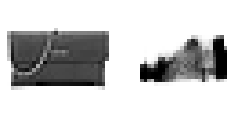

epoch:   2%|▏         | 1/50 [00:15<12:32, 15.36s/it]


Epoch 001 val_loss 0.6224


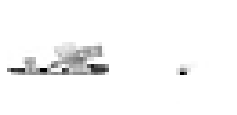

epoch:   4%|▍         | 2/50 [00:27<10:44, 13.43s/it]


Epoch 002 val_loss 0.6156


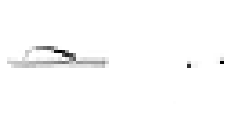

epoch:   6%|▌         | 3/50 [00:39<09:56, 12.69s/it]


Epoch 003 val_loss 0.6116


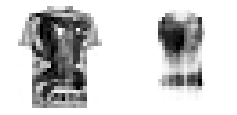

epoch:   8%|▊         | 4/50 [00:50<09:24, 12.28s/it]


Epoch 004 val_loss 0.6081


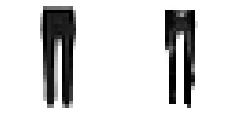

epoch:  10%|█         | 5/50 [01:02<09:05, 12.12s/it]


Epoch 005 val_loss 0.6071


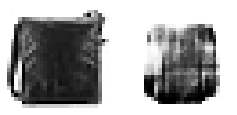

epoch:  12%|█▏        | 6/50 [01:14<08:46, 11.96s/it]


Epoch 006 val_loss 0.6057


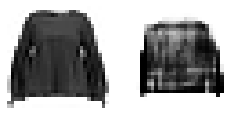

epoch:  14%|█▍        | 7/50 [01:26<08:34, 11.97s/it]


Epoch 007 val_loss 0.6030


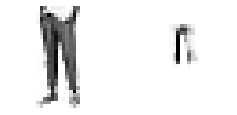

epoch:  16%|█▌        | 8/50 [01:38<08:19, 11.89s/it]


Epoch 008 val_loss 0.6032


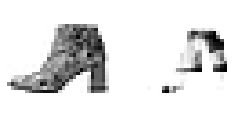

epoch:  18%|█▊        | 9/50 [01:49<08:06, 11.86s/it]


Epoch 009 val_loss 0.6016


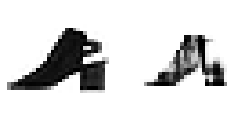

epoch:  20%|██        | 10/50 [02:01<07:55, 11.90s/it]


Epoch 010 val_loss 0.6018


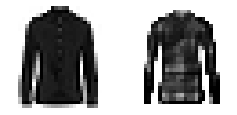

epoch:  22%|██▏       | 11/50 [02:13<07:43, 11.89s/it]


Epoch 011 val_loss 0.5994


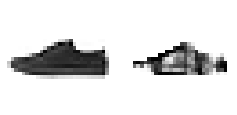

epoch:  24%|██▍       | 12/50 [02:25<07:34, 11.97s/it]


Epoch 012 val_loss 0.5984


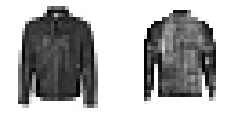

epoch:  26%|██▌       | 13/50 [02:37<07:21, 11.93s/it]


Epoch 013 val_loss 0.5976


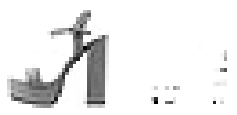

epoch:  28%|██▊       | 14/50 [02:50<07:19, 12.20s/it]


Epoch 014 val_loss 0.5969


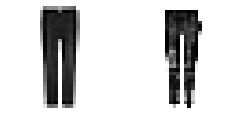

epoch:  30%|███       | 15/50 [03:02<07:08, 12.23s/it]


Epoch 015 val_loss 0.5967


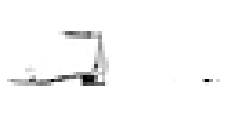

epoch:  32%|███▏      | 16/50 [03:15<06:56, 12.24s/it]


Epoch 016 val_loss 0.5965


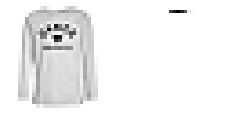

epoch:  34%|███▍      | 17/50 [03:27<06:40, 12.14s/it]


Epoch 017 val_loss 0.5954


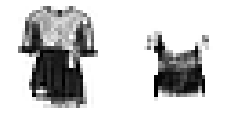

epoch:  36%|███▌      | 18/50 [03:38<06:26, 12.07s/it]


Epoch 018 val_loss 0.5956


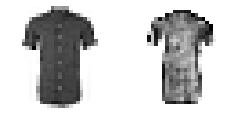

epoch:  38%|███▊      | 19/50 [03:50<06:11, 11.99s/it]


Epoch 019 val_loss 0.5959


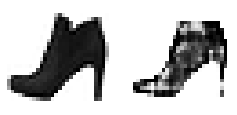

epoch:  40%|████      | 20/50 [04:02<06:00, 12.02s/it]


Epoch 020 val_loss 0.5956


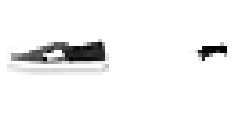

epoch:  42%|████▏     | 21/50 [04:14<05:49, 12.05s/it]


Epoch 021 val_loss 0.5946


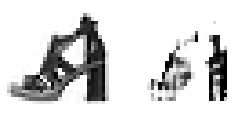

epoch:  44%|████▍     | 22/50 [04:27<05:39, 12.13s/it]


Epoch 022 val_loss 0.5942


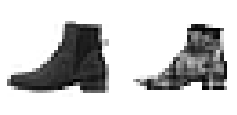

epoch:  46%|████▌     | 23/50 [04:40<05:32, 12.31s/it]


Epoch 023 val_loss 0.5941


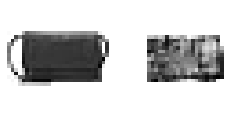

epoch:  48%|████▊     | 24/50 [04:52<05:21, 12.35s/it]


Epoch 024 val_loss 0.5943


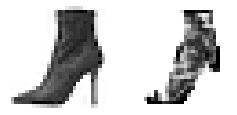

epoch:  50%|█████     | 25/50 [05:04<05:09, 12.40s/it]


Epoch 025 val_loss 0.5930


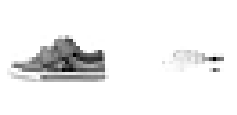

epoch:  52%|█████▏    | 26/50 [05:17<05:00, 12.54s/it]


Epoch 026 val_loss 0.5931


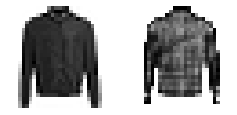

epoch:  54%|█████▍    | 27/50 [05:30<04:47, 12.51s/it]


Epoch 027 val_loss 0.5933


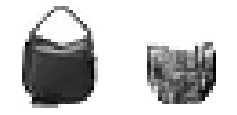

epoch:  56%|█████▌    | 28/50 [05:42<04:34, 12.50s/it]


Epoch 028 val_loss 0.5928


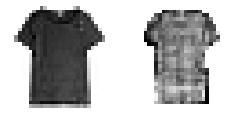

epoch:  58%|█████▊    | 29/50 [05:55<04:26, 12.68s/it]


Epoch 029 val_loss 0.5937


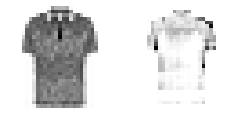

epoch:  60%|██████    | 30/50 [06:08<04:12, 12.64s/it]


Epoch 030 val_loss 0.5930


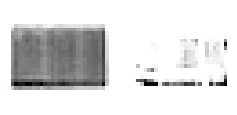

epoch:  62%|██████▏   | 31/50 [06:20<03:58, 12.54s/it]


Epoch 031 val_loss 0.5924


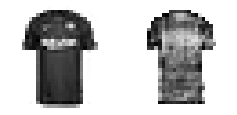

epoch:  64%|██████▍   | 32/50 [06:32<03:44, 12.46s/it]


Epoch 032 val_loss 0.5927


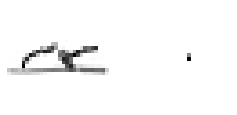

epoch:  66%|██████▌   | 33/50 [06:45<03:30, 12.38s/it]


Epoch 033 val_loss 0.5929


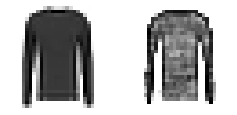

epoch:  68%|██████▊   | 34/50 [06:57<03:17, 12.35s/it]


Epoch 034 val_loss 0.5917


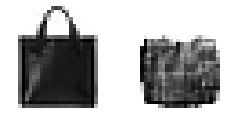

epoch:  70%|███████   | 35/50 [07:12<03:16, 13.08s/it]


Epoch 035 val_loss 0.5925


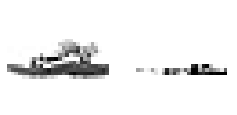

epoch:  72%|███████▏  | 36/50 [07:27<03:11, 13.64s/it]


Epoch 036 val_loss 0.5916


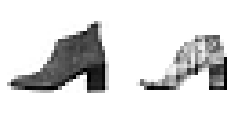

epoch:  74%|███████▍  | 37/50 [07:46<03:18, 15.24s/it]


Epoch 037 val_loss 0.5917


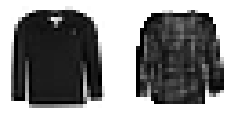

epoch:  76%|███████▌  | 38/50 [07:58<02:51, 14.33s/it]


Epoch 038 val_loss 0.5913


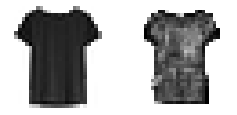

epoch:  78%|███████▊  | 39/50 [08:10<02:31, 13.75s/it]


Epoch 039 val_loss 0.5911


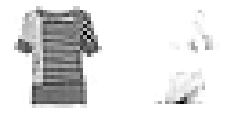

epoch:  80%|████████  | 40/50 [08:22<02:12, 13.26s/it]


Epoch 040 val_loss 0.5917


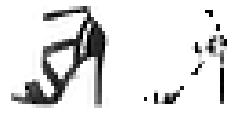

epoch:  82%|████████▏ | 41/50 [08:35<01:58, 13.22s/it]


Epoch 041 val_loss 0.5918


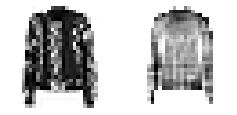

epoch:  84%|████████▍ | 42/50 [08:48<01:44, 13.10s/it]


Epoch 042 val_loss 0.5904


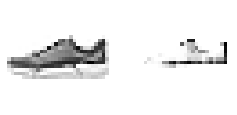

epoch:  86%|████████▌ | 43/50 [09:01<01:29, 12.83s/it]


Epoch 043 val_loss 0.5910


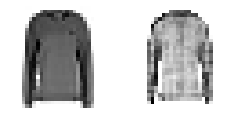

epoch:  88%|████████▊ | 44/50 [09:13<01:16, 12.69s/it]


Epoch 044 val_loss 0.5912


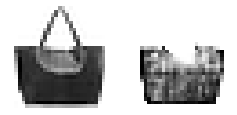

epoch:  90%|█████████ | 45/50 [09:25<01:02, 12.56s/it]


Epoch 045 val_loss 0.5903


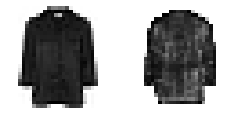

epoch:  92%|█████████▏| 46/50 [09:39<00:51, 12.87s/it]


Epoch 046 val_loss 0.5901


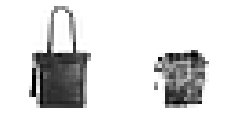

epoch:  94%|█████████▍| 47/50 [09:51<00:38, 12.69s/it]


Epoch 047 val_loss 0.5917


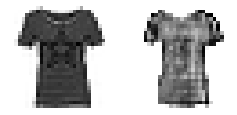

epoch:  96%|█████████▌| 48/50 [10:04<00:25, 12.64s/it]


Epoch 048 val_loss 0.5909


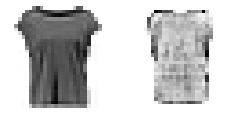

epoch:  98%|█████████▊| 49/50 [10:16<00:12, 12.60s/it]


Epoch 049 val_loss 0.5905


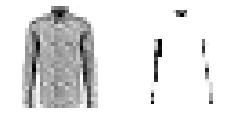

epoch: 100%|██████████| 50/50 [10:29<00:00, 12.58s/it]


Epoch 050 val_loss 0.5905


In [15]:
history = train_cvae(cvae, train_dataset, val_dataset)

In [ ]:
val_loss = history
plt.figure(figsize=(15, 9))
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
plot_tsne(net=cvae, mode='dots', count=2000, is_cvae=True)

<br>

---

<br>

## **Q3** - Implement a **conditional GAN** that generates a user-defined class [25 points]

Implement a GANs similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your generator, you have to tell it which class you want it to generate. <br> *During the lectures we created a GAN that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional GAN to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?
  - Would they be different from your choices in **Q2**?


Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).

i changed the Convolutional layers to cnn and also change the Different activations.


<br>
Because for larger dataset than this, convolutional layers are better suited for image problems. 

<br>
CNN can share the paremeters:Each cnn it find a specific feature for the image(for example,Horizontal edge detector or vertical line detector for image） parameters can be used in many parts.

<br>
if we have colors, we can use 3 channels(rgb)cnn to train. This is very effiencient for images. 

<br>
CNN also plays well in capturing translationing invariance.(shift pixels but still can see the "fashion item clearly".
<br>

In the end, the in each layer, each output value depends on small amount of input

I think it should be different in 


In [1]:
# bench mark for data code from website
import os
import sys
import numpy as np
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as dset
import torchvision.utils as vutils
import matplotlib.pyplot as plt

# Define variables
CUDA = False
DATA_PATH = './data'
batch_size = 128
epochs = 5
lr = 2e-4
classes = 10
channels = 1
img_size = 64
latent_dim = 100
log_interval = 100
CUDA = CUDA and torch.cuda.is_available()
print("PyTorch version: {}".format(torch.__version__))
if CUDA:
    print("CUDA version: {}\n".format(torch.version.cuda))

if CUDA:
    torch.cuda.manual_seed(seed)
device = torch.device("cuda:0" if CUDA else "cpu")
cudnn.benchmark = True

PyTorch version: 1.13.0+cu116


In [2]:
dataset = dset.FashionMNIST(root=DATA_PATH, download=True,
                     transform=transforms.Compose([
                     transforms.Resize(img_size),
                     transforms.ToTensor(),
                     transforms.Normalize((0.5,), (0.5,))
                     ]))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [3]:
class Generator(nn.Module):
    def __init__(self, classes, channels, img_size, latent_dim):
        super(Generator, self).__init__()
        self.classes = classes
        self.channels = channels
        self.img_size = img_size
        self.latent_dim = latent_dim
        self.img_shape = (self.channels, self.img_size, self.img_size)
        self.label_embedding = nn.Embedding(self.classes, self.classes)

        self.model = nn.Sequential(
            *self._create_layer(self.latent_dim + self.classes, 128, False),
            *self._create_layer(128, 256),
            *self._create_layer(256, 512),
            *self._create_layer(512, 1024),
            nn.Linear(1024, int(np.prod(self.img_shape))),
            nn.Tanh()
        )

    def _create_layer(self, size_in, size_out, normalize=True):
        layers = [nn.Linear(size_in, size_out)]
        if normalize:
            layers.append(nn.BatchNorm1d(size_out))
        layers.append(nn.LeakyReLU(0.2, inplace=True))
        return layers

    def forward(self, noise, labels):
        z = torch.cat((self.label_embedding(labels), noise), -1)
        x = self.model(z)
        x = x.view(x.size(0), *self.img_shape)
        return x

In [4]:

class Discriminator(nn.Module):
    def __init__(self, classes, channels, img_size, latent_dim):
        super(Discriminator, self).__init__()
        self.classes = classes
        self.channels = channels
        self.img_size = img_size
        self.latent_dim = latent_dim
        self.img_shape = (self.channels, self.img_size, self.img_size)
        self.label_embedding = nn.Embedding(self.classes, self.classes)
        self.adv_loss = torch.nn.BCELoss()

        self.model = nn.Sequential(
            *self._create_layer(self.classes + int(np.prod(self.img_shape)), 1024, False, True),
            *self._create_layer(1024, 512, True, True),
            *self._create_layer(512, 256, True, True),
            *self._create_layer(256, 128, False, False),
            *self._create_layer(128, 1, False, False),
            nn.Sigmoid()
        )

    def _create_layer(self, size_in, size_out, drop_out=True, act_func=True):
        layers = [nn.Linear(size_in, size_out)]
        if drop_out:
            layers.append(nn.Dropout(0.4))
        if act_func:
            layers.append(nn.LeakyReLU(0.2, inplace=True))
        return layers

    def forward(self, image, labels):
        x = torch.cat((image.view(image.size(0), -1), self.label_embedding(labels)), -1)
        return self.model(x)

    def loss(self, output, label):
        return self.adv_loss(output, label)

In [5]:
# Setup the generator and the discriminator
netG = Generator(classes, channels, img_size, latent_dim).to(device)
print(netG)
netD = Discriminator(classes, channels, img_size, latent_dim).to(device)
print(netD)

# Setup Adam optimizers for both G and D
optim_D = optim.Adam(netD.parameters(), lr=lr, betas=(0.5, 0.999))
optim_G = optim.Adam(netG.parameters(), lr=lr, betas=(0.5, 0.999))

Generator(
  (label_embedding): Embedding(10, 10)
  (model): Sequential(
    (0): Linear(in_features=110, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Linear(in_features=512, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Linear(in_features=1024, out_features=4096, bias=True)
    (12): Tanh()
  )
)
Discriminator(
  (label_embedding): Embedding(10, 10)
  (adv_loss): BCELoss()
  (model): Sequential(
    (

In [6]:
# Train
img_list = []

netG.train()
netD.train()
viz_z = torch.zeros((batch_size, latent_dim), device=device)
viz_noise = torch.randn(batch_size, latent_dim, device=device)
nrows = batch_size // 8
viz_label = torch.LongTensor(np.array([num for _ in range(nrows) for num in range(8)])).to(device)

for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(dataloader):
        data, target = data.to(device), target.to(device)
        batch_size = data.size(0)
        real_label = torch.full((batch_size, 1), 1., device=device)
        fake_label = torch.full((batch_size, 1), 0., device=device)

        # Train G
        netG.zero_grad()
        z_noise = torch.randn(batch_size, latent_dim, device=device)
        x_fake_labels = torch.randint(0, classes, (batch_size,), device=device)
        x_fake = netG(z_noise, x_fake_labels)
        y_fake_g = netD(x_fake, x_fake_labels)
        g_loss = netD.loss(y_fake_g, real_label)
        g_loss.backward()
        optim_G.step()

        # Train D
        netD.zero_grad()
        y_real = netD(data, target)
        d_real_loss = netD.loss(y_real, real_label)
        y_fake_d = netD(x_fake.detach(), x_fake_labels)
        d_fake_loss = netD.loss(y_fake_d, fake_label)
        d_loss = (d_real_loss + d_fake_loss) / 2
        d_loss.backward()
        optim_D.step()
        
        if batch_idx % log_interval == 0 and batch_idx > 0:
            print('Epoch {} [{}/{}] loss_D: {:.4f} loss_G: {:.4f}'.format(
                        epoch, batch_idx, len(dataloader),
                        d_loss.mean().item(),
                        g_loss.mean().item()))
            
            with torch.no_grad():
                viz_sample = netG(viz_noise, viz_label)
                img_list.append(vutils.make_grid(viz_sample, normalize=True))

Epoch 0 [100/469] loss_D: 0.4780 loss_G: 0.6360
Epoch 0 [200/469] loss_D: 0.3555 loss_G: 1.4999
Epoch 0 [300/469] loss_D: 0.3513 loss_G: 1.7991
Epoch 0 [400/469] loss_D: 0.3977 loss_G: 1.2316
Epoch 1 [100/469] loss_D: 0.4747 loss_G: 3.4017
Epoch 1 [200/469] loss_D: 1.1087 loss_G: 0.1651
Epoch 1 [300/469] loss_D: 0.3951 loss_G: 1.0936
Epoch 1 [400/469] loss_D: 0.5152 loss_G: 0.8787
Epoch 2 [100/469] loss_D: 0.5305 loss_G: 2.3033
Epoch 2 [200/469] loss_D: 1.1792 loss_G: 0.1446
Epoch 2 [300/469] loss_D: 0.5705 loss_G: 1.1399
Epoch 2 [400/469] loss_D: 0.4687 loss_G: 1.3688
Epoch 3 [100/469] loss_D: 0.5105 loss_G: 1.0203
Epoch 3 [200/469] loss_D: 0.5124 loss_G: 1.3812
Epoch 3 [300/469] loss_D: 0.4847 loss_G: 1.3360
Epoch 3 [400/469] loss_D: 1.1268 loss_G: 0.1513
Epoch 4 [100/469] loss_D: 0.6917 loss_G: 0.4495
Epoch 4 [200/469] loss_D: 0.6087 loss_G: 1.5750
Epoch 4 [300/469] loss_D: 0.5772 loss_G: 1.1641
Epoch 4 [400/469] loss_D: 0.4913 loss_G: 1.2437


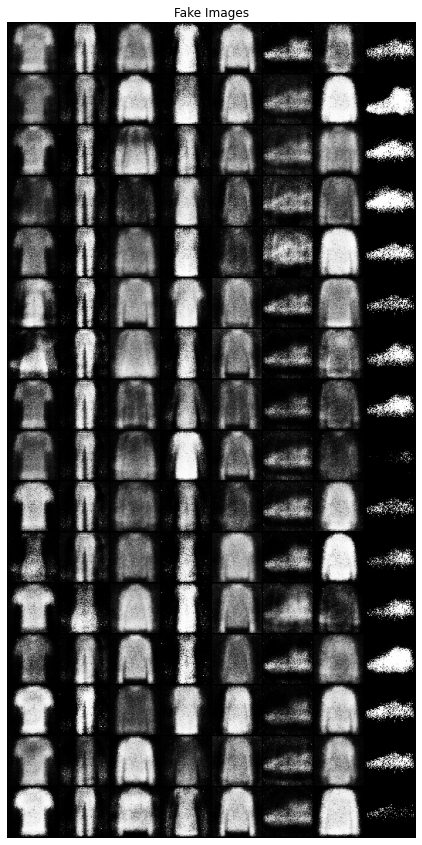

In [7]:
# Plot the fake images
plt.figure(figsize=(15,15))
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

In [67]:
from sklearn.metrics import accuracy_score
from livelossplot import PlotLosses
import torchvision.transforms as tforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import PIL.Image as Image
import os
import torchvision
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
batch_size = 500
device = 'gpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

def mkdir(paths):
    if not isinstance(paths, (list, tuple)):
        paths = [paths]
    for path in paths:
        if not os.path.isdir(path):
            os.makedirs(path)
experiment_name =  "CGAN"

mkdir('./output/%s' % experiment_name)



Cuda installed! Running on GPU!


In [68]:
transform = transforms.Compose([
    tforms.Resize(size=(32, 32), interpolation=Image.BICUBIC),
    tforms.ToTensor(),
    tforms.Lambda(lambda x: torch.cat((x, x, x), dim=0)),
    tforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)])
# train_dataset = FashionMNIST(root='./fashion_mnist_data/', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(
    dataset=dsets.FashionMNIST('data/FashionMNIST', train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory=device,
    drop_last=True
)

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [69]:
#generate network by cnn
class Generator(nn.Module):
    def __init__(self, z_dim, c_dim, dim=128):
        super(Generator, self).__init__()

        def dconv_bn_relu(in_dim, out_dim, kernel_size=4, stride=2, padding=1, output_padding=0):
            return nn.Sequential(
                nn.ConvTranspose2d(in_dim, out_dim, kernel_size, stride, padding, output_padding),
                nn.BatchNorm2d(out_dim),
                nn.ReLU()
            )

        self.ls = nn.Sequential(
            dconv_bn_relu(z_dim + c_dim, dim * 4, 4, 1, 0, 0),  # (N, dim * 4, 4, 4)
            dconv_bn_relu(dim * 4, dim * 2),  # (N, dim * 2, 8, 8)
            dconv_bn_relu(dim * 2, dim),   # (N, dim, 16, 16)
            nn.ConvTranspose2d(dim, 3, 4, 2, padding=1), nn.Tanh()  # (N, 3, 32, 32)
        )

    def forward(self, z, c):
        # z: (N, z_dim), c: (N, c_dim)
        x = torch.cat([z, c], 1)
        test = x.view(x.size(0), x.size(1), 1, 1)
        x = self.ls(test)
        return x

class NoOp(nn.Module):
    
    def __init__(self, *args, **keyword_args):
        super(NoOp, self).__init__()

    def forward(self, x):
        return x


class Reshape(nn.Module):
    
    def __init__(self, *new_shape):
        super(Reshape, self).__init__()
        self._new_shape = new_shape

    def forward(self, x):
        new_shape = (x.size(i) if self._new_shape[i] == 0 else self._new_shape[i] for i in range(len(self._new_shape)))
        return x.view(*new_shape)
#Discriminator
class Discriminator(nn.Module):

    def __init__(self, x_dim, c_dim, dim=96):
        super(Discriminator, self).__init__()

        norm_fn = NoOp
        weight_norm_fn = torch.nn.utils.spectral_norm

        def conv_norm_lrelu(in_dim, out_dim, kernel_size=3, stride=1, padding=1):
            return nn.Sequential(
                weight_norm_fn(nn.Conv2d(in_dim, out_dim, kernel_size, stride, padding)),
                norm_fn(out_dim),
                nn.LeakyReLU(0.2)
            )

        self.ls = nn.Sequential(  # (N, x_dim+c_dim, 32, 32)
            conv_norm_lrelu(x_dim + c_dim, dim),
            conv_norm_lrelu(dim, dim),
            conv_norm_lrelu(dim, dim, stride=2),  # (N, dim , 16, 16)

            conv_norm_lrelu(dim, dim * 2),
            conv_norm_lrelu(dim * 2, dim * 2),
            conv_norm_lrelu(dim * 2, dim * 2, stride=2),  # (N, dim*2, 8, 8)

            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=3, stride=1, padding=0),
            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=1, stride=1, padding=0),
            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=1, stride=1, padding=0),  # (N, dim*2, 6, 6)

            nn.AvgPool2d(kernel_size=6),  # (N, dim*2, 1, 1)
            Reshape(-1, dim * 2),  # (N, dim*2)
            weight_norm_fn(nn.Linear(dim * 2, 1))  # (N, 1)
        )

    def forward(self, x, c):
        # x: (N, x_dim, 32, 32), c: (N, c_dim)
        c = c.view(c.size(0), c.size(1), 1, 1) * torch.ones([c.size(0), c.size(1), x.size(2), x.size(3)], dtype=c.dtype, device=c.device)
        logit = self.ls(torch.cat([x, c], 1))
        return logit

#Discriminator loss function
def d_loss_fn(r_logit, f_logit):
    r_loss = torch.max(1 - r_logit, torch.zeros_like(r_logit)).mean()
    f_loss = torch.max(1 + f_logit, torch.zeros_like(f_logit)).mean()
    return r_loss, f_loss
#generate loss
def g_loss_fn(f_logit):
    f_loss = - f_logit.mean()
    return f_loss

In [70]:
z_dim = 100
c_dim = 10
# build model
G = Generator(z_dim=z_dim, c_dim=c_dim).to(device)
D = Discriminator(x_dim=3, c_dim=c_dim).to(device)


# optimiser
lr = 0.0001 
G_optimizer = torch.optim.Adam(G.parameters(), lr = lr)
D_optimizer = torch.optim.Adam(D.parameters(), lr = lr)

def D_train(x,c_dense):
    #-------------- Function of the discriminator training -------------------#
    D.train()
    D_optimizer.zero_grad()

    # train discriminator on real data -- assign high score (use 1 here)
    # x_real, y_real = x.view(-1, 32*32), torch.ones(batch_size, 1)  # we are assigning the label 'real data' to the samples (don't care anymore about what number they are)
    x_real = x.to(device)
    #print(x_real)
    D_output = D(x_real,c_dense)

    # train discriminator on fake data -- assign low score (use 0 here)
    # sample vector and produce generator output
    z = torch.randn(batch_size, z_dim).to(device)
    x_fake = G(z,c_dense).detach()

    D_fake_output = D(x_fake,c_dense)
    d_x_gan_loss, d_x_f_gan_loss = d_loss_fn(D_output, D_fake_output)
    D_loss = d_x_gan_loss+d_x_f_gan_loss
    # combine the losses

    # model update 
    D.zero_grad()
    D_loss.backward()
    D_optimizer.step()
        
    return  D_loss.data.item()  ### deprecated version of loss.detach(), basically gets access to the tensor without the computational graph attached

def G_train(x,c_dense):
    #-------------- Function of the generator training -------------------#
    G.train()
    G_optimizer.zero_grad()

    # sample vector and produce generator output
    z = torch.randn(batch_size, z_dim).to(device)
    G_output = G(z,c_dense)

    # obtain scores from D for the generated data
    D_output = D(G_output,c_dense)

    # train generator to "fool" discriminator
    G_loss = g_loss_fn(D_output)

    # model update 
    G.zero_grad()
    G_loss.backward()
    G_optimizer.step()
        
    return G_loss.data.item()  ### deprecated version of loss.detach(), basically gets access to the tensor without the computational graph attached


In [73]:
# run 30 epoch for time limit
z_sample = torch.randn(c_dim * 10, z_dim).to(device)
c_sample = torch.tensor(np.concatenate([np.eye(c_dim)] * 10), dtype=z_sample.dtype).to(device)

n_epoch = 1 # i have more epoch show in the google drive， 
# this epoch = 1 only for test purpose for time limitation
groups = {'Loss': ['D_Loss', 'G_Loss']}
liveloss = PlotLosses(groups=groups)
z = torch.randn(batch_size, z_dim).to(device)
step = 0
for epoch in range(1, n_epoch+1):  
    D_losses, G_losses = [], []
    logs = {}
    for batch_idx, (x, c_dense) in enumerate(train_loader):
        step += 1
        c = torch.tensor(np.eye(c_dim)[c_dense.cpu().numpy()], dtype=z.dtype).to(device)
        print("epoch = %d,batch_idx = %d"%(epoch,batch_idx))
        logs['D_Loss'] = D_train(x,c)
        logs['G_Loss'] = G_train(x,c)

        # liveloss.update(logs)
        # liveloss.draw()

        if step % 100 == 0:
            G.eval()
            x_f_sample = (G(z_sample, c_sample) + 1) / 2.0

            save_dir = './output/%s/sample_training' % "CGAN_default"
            mkdir(save_dir)
            torchvision.utils.save_image(x_f_sample, '%s/Epoch_(%d)_(%dof%d).jpg' % (save_dir, epoch, batch_idx + 1, len(train_loader)), nrow=10)
            # save image，please find in the drive


    



epoch = 1,batch_idx = 0
epoch = 1,batch_idx = 1
epoch = 1,batch_idx = 2
epoch = 1,batch_idx = 3
epoch = 1,batch_idx = 4
epoch = 1,batch_idx = 5
epoch = 1,batch_idx = 6
epoch = 1,batch_idx = 7
epoch = 1,batch_idx = 8
epoch = 1,batch_idx = 9
epoch = 1,batch_idx = 10
epoch = 1,batch_idx = 11
epoch = 1,batch_idx = 12
epoch = 1,batch_idx = 13
epoch = 1,batch_idx = 14
epoch = 1,batch_idx = 15
epoch = 1,batch_idx = 16
epoch = 1,batch_idx = 17
epoch = 1,batch_idx = 18
epoch = 1,batch_idx = 19
epoch = 1,batch_idx = 20
epoch = 1,batch_idx = 21
epoch = 1,batch_idx = 22
epoch = 1,batch_idx = 23
epoch = 1,batch_idx = 24
epoch = 1,batch_idx = 25
epoch = 1,batch_idx = 26
epoch = 1,batch_idx = 27
epoch = 1,batch_idx = 28
epoch = 1,batch_idx = 29
epoch = 1,batch_idx = 30
epoch = 1,batch_idx = 31
epoch = 1,batch_idx = 32
epoch = 1,batch_idx = 33
epoch = 1,batch_idx = 34
epoch = 1,batch_idx = 35
epoch = 1,batch_idx = 36
epoch = 1,batch_idx = 37
epoch = 1,batch_idx = 38
epoch = 1,batch_idx = 39
epoch = 1,

In [ ]:
# todo：show the image from drive

it is generated on my local machine for 200 epoch. while I rerun the cgan in google colab and it is so slow，so i put a screenshot as a reference.

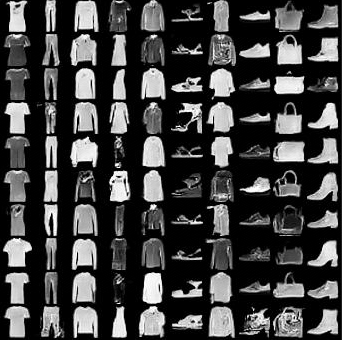

<br>

---

<br>

## **Q4** - Analysis and comparison of results [20 points]

Analyse and compare the results you have obtained with the two networks above.

- Use the data you generated training the three networks above to discuss the results you have generated in **Q2** and **Q3**.
- Is there a network that performs better than the other? Why do you think that is?
- What could you do to improve your results on each of the networks you have implemented? ***\[limit your answer to this question to 150 words\]***

**IMPORTANT NOTE**: even if you did not complete **Q2** and **Q3**, make sure to include a discussion with any partial results or other considerations regarding the performance of your implemented methods.

cGAN is better in terms of picture quality.
<br>
1) Although I use small epoch(like 5) for cGAn , the quality of image is more decent compared to cVae with small epoch.We can conclude that: cGAN generates sharper images,the cVAE has more smooth edges, with low image quality.
<br>
2) While cGANs need longer ** time **. Although 5 epoch, it spend longer time than cVAE. It is so time-consuming to rerun the network compared to vae.
<br>
3) The training result of cvae is  more stable than cgan .

<br>
how to improve it?
<br>
For network itself:
<br>
1）Change the linear nerwork to CNN will be better.（only for vae). 
<br>
Notes: I have tried linear and it is even better than cnn in cgan， while I do not have time to change it back to linear, so only cgan with cnn showed above
<br>
<br>
2）I suppose add padding will also be better to make samples in the edges to be more useful.
<br>
3)  Stride can be bigger to make it faster.
<br>
4）For long time of gan, mobileNet based architecture that consists of depthwise separable convolution will reduce inference time according to [paper](https://arxiv.org/abs/2111.15438)
<br>
5）For VAE, one of the biggest problem is that KL may have some questions: KL-vanishing. KL is very important when we calculate the difference between 
Read a paper, we can try [cyclical annealing](https://arxiv.org/abs/1903.10145)
<br>




<br>

---

<br>

## **Q5** - Modify your dataset to create data imbalance and retrain **one** of your conditional models [20 points]

Modify the `FashionMNIST` dataset to eliminate 90% of the images corresponding to one of the classes in the dataset (whichever you want).

Now, **choose one of the two questions below (a or b)**:

- **Q5-a) Retrain your conditional VAE from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- **Q5-b) Retrain your conditional GAN from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- Compare the results of this new images generated with the modified dataset with the original results from questions **Q2** or **Q3** (depending of whether you have chosen **Q5-a** or **Q5-b**). What do you observe? Describe your interpretation of this comparison.

### My oberservation in retraining conditional GAN 

Compare to the balance data using cgan, the imbalance one performes worse due to sometimes it give wrong classification for class 1 which have smaller samples.

<br>



### My interpretation
Becasue with unbalanced datasets, the cGAN are often biased towards the majority classes and therefore there is a higher miss-classification rate for the minority class instances(which is class 1 in my case).

From one paper, I learned generative adversarial network (GAN) using variational autoencoder (VAE) will fix the unbalance data problem is better, which can try in the future.

### Code

In [43]:
# dir set
batch_size = 500
device = 'gpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

def mkdir(paths):
    if not isinstance(paths, (list, tuple)):
        paths = [paths]
    for path in paths:
        if not os.path.isdir(path):
            os.makedirs(path)
experiment_name =  "CGAN-Unbalance"

mkdir('./output/%s' % experiment_name)

Cuda installed! Running on GPU!


In [44]:
# data load
transform = transforms.Compose([
    tforms.Resize(size=(32, 32), interpolation=Image.BICUBIC),
    tforms.ToTensor(),
    tforms.Lambda(lambda x: torch.cat((x, x, x), dim=0)),
    tforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)])
# train_dataset = FashionMNIST(root='./fashion_mnist_data/', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(
    dataset=dsets.FashionMNIST('data/FashionMNIST', train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory=device,
    drop_last=True
)

In [45]:
#generator
class Generator(nn.Module):
    def __init__(self, z_dim, c_dim, dim=128):
        super(Generator, self).__init__()

        def dconv_bn_relu(in_dim, out_dim, kernel_size=4, stride=2, padding=1, output_padding=0):
            return nn.Sequential(
                nn.ConvTranspose2d(in_dim, out_dim, kernel_size, stride, padding, output_padding),
                nn.BatchNorm2d(out_dim),
                nn.ReLU()
            )

        self.ls = nn.Sequential(
            dconv_bn_relu(z_dim + c_dim, dim * 4, 4, 1, 0, 0),  # (N, dim * 4, 4, 4)
            dconv_bn_relu(dim * 4, dim * 2),  # (N, dim * 2, 8, 8)
            dconv_bn_relu(dim * 2, dim),   # (N, dim, 16, 16)
            nn.ConvTranspose2d(dim, 3, 4, 2, padding=1), nn.Tanh()  # (N, 3, 32, 32)
        )

    def forward(self, z, c):
        # z: (N, z_dim), c: (N, c_dim)
        x = torch.cat([z, c], 1)
        test = x.view(x.size(0), x.size(1), 1, 1)
        x = self.ls(test)
        return x

class NoOp(nn.Module):
    
    def __init__(self, *args, **keyword_args):
        super(NoOp, self).__init__()

    def forward(self, x):
        return x


class Reshape(nn.Module):
    
    def __init__(self, *new_shape):
        super(Reshape, self).__init__()
        self._new_shape = new_shape

    def forward(self, x):
        new_shape = (x.size(i) if self._new_shape[i] == 0 else self._new_shape[i] for i in range(len(self._new_shape)))
        return x.view(*new_shape)
#  Discriminator
class Discriminator(nn.Module):

    def __init__(self, x_dim, c_dim, dim=96):
        super(Discriminator, self).__init__()

        norm_fn = NoOp
        weight_norm_fn = torch.nn.utils.spectral_norm

        def conv_norm_lrelu(in_dim, out_dim, kernel_size=3, stride=1, padding=1):
            return nn.Sequential(
                weight_norm_fn(nn.Conv2d(in_dim, out_dim, kernel_size, stride, padding)),
                norm_fn(out_dim),
                nn.LeakyReLU(0.2)
            )

        self.ls = nn.Sequential(  # (N, x_dim+c_dim, 32, 32)
            conv_norm_lrelu(x_dim + c_dim, dim),
            conv_norm_lrelu(dim, dim),
            conv_norm_lrelu(dim, dim, stride=2),  # (N, dim , 16, 16)

            conv_norm_lrelu(dim, dim * 2),
            conv_norm_lrelu(dim * 2, dim * 2),
            conv_norm_lrelu(dim * 2, dim * 2, stride=2),  # (N, dim*2, 8, 8)

            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=3, stride=1, padding=0),
            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=1, stride=1, padding=0),
            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=1, stride=1, padding=0),  # (N, dim*2, 6, 6)

            nn.AvgPool2d(kernel_size=6),  # (N, dim*2, 1, 1)
            Reshape(-1, dim * 2),  # (N, dim*2)
            weight_norm_fn(nn.Linear(dim * 2, 1))  # (N, 1)
        )

    def forward(self, x, c):
        # x: (N, x_dim, 32, 32), c: (N, c_dim)
        c = c.view(c.size(0), c.size(1), 1, 1) * torch.ones([c.size(0), c.size(1), x.size(2), x.size(3)], dtype=c.dtype, device=c.device)
        logit = self.ls(torch.cat([x, c], 1))
        return logit

#loss of d
def d_loss_fn(r_logit, f_logit):
    r_loss = torch.max(1 - r_logit, torch.zeros_like(r_logit)).mean()
    f_loss = torch.max(1 + f_logit, torch.zeros_like(f_logit)).mean()
    return r_loss, f_loss
#loss of g
def g_loss_fn(f_logit):
    f_loss = - f_logit.mean()
    return f_loss

In [46]:
z_dim = 100
c_dim = 11
# build model
G = Generator(z_dim=z_dim, c_dim=c_dim).to(device)
D = Discriminator(x_dim=3, c_dim=c_dim).to(device)


# optimiser
lr = 0.0001 
G_optimizer = torch.optim.Adam(G.parameters(), lr = lr)
D_optimizer = torch.optim.Adam(D.parameters(), lr = lr)

def D_train(x,c_dense):
    #-------------- Function of the discriminator training -------------------#
    D.train()
    D_optimizer.zero_grad()

    # train discriminator on real data -- assign high score (use 1 here)
    # x_real, y_real = x.view(-1, 32*32), torch.ones(batch_size, 1)  # we are assigning the label 'real data' to the samples (don't care anymore about what number they are)
    x_real = x.to(device)
    #print(x_real)
    D_output = D(x_real,c_dense)

    # train discriminator on fake data -- assign low score (use 0 here)
    # sample vector and produce generator output
    z = torch.randn(batch_size, z_dim).to(device)
    x_fake = G(z,c_dense).detach()

    D_fake_output = D(x_fake,c_dense)
    d_x_gan_loss, d_x_f_gan_loss = d_loss_fn(D_output, D_fake_output)
    D_loss = d_x_gan_loss+d_x_f_gan_loss
    # combine the losses

    # model update 
    D.zero_grad()
    D_loss.backward()
    D_optimizer.step()
        
    return  D_loss.data.item()  ### deprecated version of loss.detach(), basically gets access to the tensor without the computational graph attached

def G_train(x,c_dense):
    #-------------- Function of the generator training -------------------#
    G.train()
    G_optimizer.zero_grad()

    # sample vector and produce generator output
    z = torch.randn(batch_size, z_dim).to(device)
    G_output = G(z,c_dense)

    # obtain scores from D for the generated data
    D_output = D(G_output,c_dense)

    # train generator to "fool" discriminator
    G_loss = g_loss_fn(D_output)

    # model update 
    G.zero_grad()
    G_loss.backward()
    G_optimizer.step()
        
    return G_loss.data.item()  ### deprecated version of loss.detach(), basically gets access to the tensor without the computational graph attached


In [48]:
# run
z_sample = torch.randn(c_dim * 10, z_dim).to(device)
c_sample = torch.tensor(np.concatenate([np.eye(c_dim)] * 10), dtype=z_sample.dtype).to(device)
count = 0
n_epoch = 20 # about 40 minutes
groups = {'Loss': ['D_Loss', 'G_Loss']}
liveloss = PlotLosses(groups=groups)
z = torch.randn(batch_size, z_dim).to(device)
step = 0
zero = torch.zeros(3,32,32)
for epoch in range(1, n_epoch+1):  
    D_losses, G_losses = [], []
    logs = {}
    for batch_idx, (x, c_dense) in enumerate(train_loader):
      # data change to imbalance，delete 90% 
        for loop in range(len(c_dense)):
            # print("c_dense = %d"%c_dense[loop].item())
            if c_dense[loop].item() == 1:
                count += 1
                if count != 10:
                    c_dense[loop] = 10
                    x[loop,:,:,:] = zero
                else:
                    count = 0

        step += 1
        c = torch.tensor(np.eye(c_dim)[c_dense.cpu().numpy()], dtype=z.dtype).to(device)
        print("epoch = %d,batch_idx = %d"%(epoch,batch_idx))
        logs['D_Loss'] = D_train(x,c)
        logs['G_Loss'] = G_train(x,c)

        # liveloss.update(logs)
        # liveloss.draw()

        if step % 100 == 0:
            G.eval()
            x_f_sample = (G(z_sample, c_sample) + 1) / 2.0

            save_dir = './output/%s/sample_training' % experiment_name
            mkdir(save_dir)
            torchvision.utils.save_image(x_f_sample, '%s/Epoch_(%d)_(%dof%d).jpg' % (save_dir, epoch, batch_idx + 1, len(train_loader)), nrow=11)



epoch = 1,batch_idx = 0
epoch = 1,batch_idx = 1
epoch = 1,batch_idx = 2
epoch = 1,batch_idx = 3
epoch = 1,batch_idx = 4
epoch = 1,batch_idx = 5
epoch = 1,batch_idx = 6
epoch = 1,batch_idx = 7
epoch = 1,batch_idx = 8
epoch = 1,batch_idx = 9
epoch = 1,batch_idx = 10
epoch = 1,batch_idx = 11
epoch = 1,batch_idx = 12
epoch = 1,batch_idx = 13
epoch = 1,batch_idx = 14
epoch = 1,batch_idx = 15
epoch = 1,batch_idx = 16
epoch = 1,batch_idx = 17
epoch = 1,batch_idx = 18
epoch = 1,batch_idx = 19
epoch = 1,batch_idx = 20
epoch = 1,batch_idx = 21
epoch = 1,batch_idx = 22
epoch = 1,batch_idx = 23
epoch = 1,batch_idx = 24
epoch = 1,batch_idx = 25
epoch = 1,batch_idx = 26
epoch = 1,batch_idx = 27
epoch = 1,batch_idx = 28
epoch = 1,batch_idx = 29
epoch = 1,batch_idx = 30
epoch = 1,batch_idx = 31
epoch = 1,batch_idx = 32
epoch = 1,batch_idx = 33
epoch = 1,batch_idx = 34
epoch = 1,batch_idx = 35
epoch = 1,batch_idx = 36
epoch = 1,batch_idx = 37
epoch = 1,batch_idx = 38
epoch = 1,batch_idx = 39
epoch = 1,

Picture saves in the google drive: /content/output/CGAN-Unbalance/sample_training

Due to the time limitaion, only 20 epoch was runned here. 